In [1]:
from proportion_test import prop_test_1sample as pt1


pt1(9,250,.073,print_out=True)

One sample propotion test
Z porption test p-value 0.033 for real p equals p0.
Binomial test p-value 0.011 for gettig less or equal events if real p equals p0.


{'Z p': 0.03339190637859857, 'Binomial p': 0.01103610978073807}

In [5]:
(1-0.9877406177519058)*2

0.024518764496188394

In [2]:
from scipy.stats import norm
9/250+norm.ppf(.975)*(9/250*(1-9/250)/250)**.5

0.05909233525768833

/tmp/ipykernel_2375/1599445332.py:10: RuntimeWarning: invalid value encountered in scalar divide
  PL=[2*x*fi/(2*(n-x+1)+2*x*fi) for fi in F]


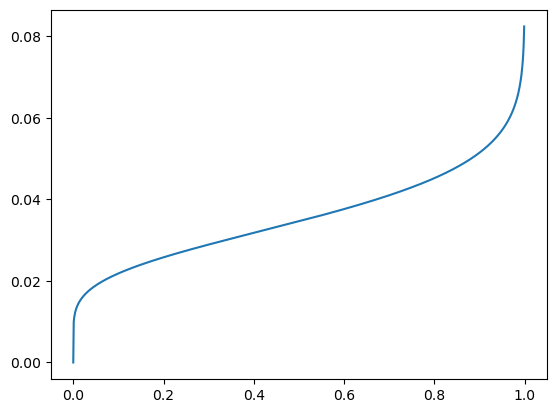

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import f as f_dist
n=250
x=9
v1=2*x
v2=2*(n-x+1)
X=np.linspace(0,1,1000)
F=[f_dist.ppf(xi,2*x,2*(n-x+1)) for xi in X]
PL=[2*x*fi/(2*(n-x+1)+2*x*fi) for fi in F]
plt.plot(X,PL)

/tmp/ipykernel_2375/1249314270.py:7: RuntimeWarning: invalid value encountered in scalar divide
  PL=[v1*fi/(v2+v1*fi) for fi in F]


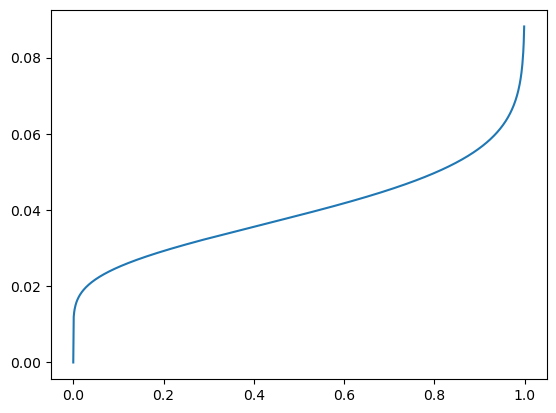

In [6]:
n=250
x=9
v1=2*x+2
v2=2*(n-x)
X=np.linspace(1,0,1000)
F=[f_dist.ppf(xi,v1,v2) for xi in X]
PL=[v1*fi/(v2+v1*fi) for fi in F]
plt.plot(X,PL)

In [8]:
xx=[(xi,abs(pli-0.073)) for xi,pli in zip(X,PL)]
sorted(xx, key=lambda x:x[1])

[(1.0, nan),
 (0.988988988988989, 1.551002619511188e-05),
 (0.987987987987988, 0.0005791516036307981),
 (0.98998998998999, 0.0006623900101292157),
 (0.986986986986987, 0.001129757799709627),
 (0.990990990990991, 0.0013721892776772104),
 (0.985985985985986, 0.0016426801943198455),
 (0.984984984984985, 0.0021229894798823618),
 (0.991991991991992, 0.002159330238596907),
 (0.983983983983984, 0.0025747883646523445),
 (0.982982982982983, 0.003001444185628907),
 (0.992992992992993, 0.0030439257477224563),
 (0.9819819819819819, 0.003405755454438039),
 (0.980980980980981, 0.0037900736749253844),
 (0.993993993993994, 0.004055258726166591),
 (0.97997997997998, 0.0041563941332080495),
 (0.978978978978979, 0.004506424697748465),
 (0.977977977977978, 0.004841638734943518),
 (0.9769769769769769, 0.005163316353463926),
 (0.994994994994995, 0.005238425674209596),
 (0.975975975975976, 0.00547257694063788),
 (0.974974974974975, 0.005770405111130292),
 (0.973973973973974, 0.006057671608722656),
 (0.972972

In [3]:
import math
from scipy.stats import binom

def calculate_pmf(n, k, theta):
    return math.comb(n, k) * (theta**k) * ((1-theta)**(n-k))

def calculate_discontinuity_points(n, k):
    sigma_ik = []
    for i in range(n+1):
        if i != k:
            def equation(sigma):
                return calculate_pmf(n, i, sigma) - calculate_pmf(n, k, sigma)
            
            # Use numerical method to find root (e.g., bisection method)
            # This is a simplified version, you might want to use a more robust method
            left, right = 0, 1
            while right - left > 1e-10:
                mid = (left + right) / 2
                if equation(mid) * equation(left) > 0:
                    left = mid
                else:
                    right = mid
            sigma_ik.append((i, left))
    return sorted(sigma_ik, key=lambda x: x[1])

def modified_sterne_pvalue(n, k, theta_0):
    # Step 1: Calculate PMF at theta_0
    pmf_k = calculate_pmf(n, k, theta_0)
    
    # Step 2: Identify the continuous segment
    discontinuity_points = calculate_discontinuity_points(n, k)
    segment = next((i for i, (_, sigma) in enumerate(discontinuity_points) if sigma > theta_0), len(discontinuity_points)) - 1
    
    # Step 3: Calculate f_k(theta_0)
    f_k_theta_0 = sum(calculate_pmf(n, i, theta_0) for i in range(n+1) 
                      if calculate_pmf(n, i, theta_0) <= pmf_k)
    
    # Step 4: Check boundary conditions
    if f_k_theta_0 == 1 or segment in [0, len(discontinuity_points)-1]:
        return f_k_theta_0
    
    # Step 5: Determine sigma
    sigma = discontinuity_points[segment][1] if discontinuity_points[segment][1] <= theta_0 else discontinuity_points[segment+1][1]
    
    # Step 6: Calculate f_k(sigma)
    f_k_sigma = sum(calculate_pmf(n, i, sigma) for i in range(n+1) 
                    if calculate_pmf(n, i, sigma) <= calculate_pmf(n, k, sigma))
    
    # Step 7: Output the maximum

    return f_k_theta_0, f_k_sigma

# Example usage
n = 250
k = 9
theta_0 = 0.073

print(modified_sterne_pvalue(n, k, theta_0))
# print(f"Modified Sterne p-value: {p_value}")


0.020464381934623015


In [4]:
import numpy as np
from scipy import stats

def one_sample_proportion_lr_test(x, n, p0):
    """
    Perform a one-sample proportion test using the likelihood ratio method.
    
    Parameters:
    x (int): Number of successes
    n (int): Sample size
    p0 (float): Hypothesized proportion under the null hypothesis
    
    Returns:
    float: p-value of the test
    """
    # Calculate the sample proportion
    p_hat = x / n
    
    # Calculate the likelihood ratio statistic
    lr = 2 * (x * np.log(p_hat / p0) + (n - x) * np.log((1 - p_hat) / (1 - p0)))
    
    # Calculate the p-value using chi-square distribution with 1 degree of freedom
    p_value = 1 - stats.chi2.cdf(lr, df=1)
    
    return p_value

# Example usage
x = 9  # number of successes
n = 250  # sample size
p0 = 0.073  # null hypothesis proportion

p_value = one_sample_proportion_lr_test(x, n, p0)
print(f"P-value: {p_value:.4f}")


P-value: 0.0132
